'(2*((x-2)*(x-3)*(x-4)*(x-5)*(x-6))/((-1)*(-2)*(-3)*(-4)*(-5)))+(3*((x-1)*(x-3)*(x-4)*(x-5)*(x-6))/((1)*(-1)*(-2)*(-3)*(-4)))+(3*((x-1)*(x-2)*(x-4)*(x-5)*(x-6))/((2)*(1)*(-1)*(-2)*(-3)))+(7*((x-1)*(x-2)*(x-3)*(x-5)*(x-6))/((3)*(2)*(1)*(-1)*(-2)))+(0*((x-1)*(x-2)*(x-3)*(x-4)*(x-6))/((4)*(3)*(2)*(1)*(-1)))+(7*((x-1)*(x-2)*(x-3)*(x-4)*(x-5))/((5)*(4)*(3)*(2)*(1)))'

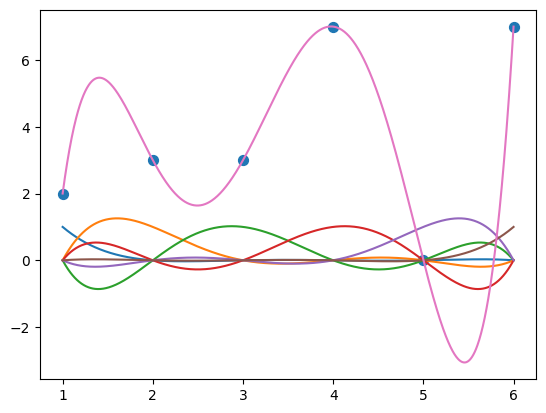

In [21]:
import collections
import numpy as np
import matplotlib.pyplot as plt

def points(l):
    """
    Graphs the inputted points into the graph to show.
    """
    # Graph points.
    x = [x for x in l]
    y = [l[x] for x in l]
    plt.scatter(x,y, 50)
    
def li(x,l):
    """
    Returns the lagrange polynomial for a set x value in a list.
    """ 
    maximum = max(l)
    minimum = min(l)
    polynomial = ""
    suffix = ""
    for i in range(minimum, maximum+1):
        if (i != x):
            polynomial += "(x-"+str(i)+")*"
            suffix += "("+str(-i+int(x))+")*" # At x=x, y should be 1. 
        
    if (polynomial[-1] == "*"):
        suffix = "("+suffix[:-1]+")"
        polynomial = "("+polynomial[:-1]+")"
    polynomial += "/"+suffix    
    return polynomial

def e(poly, l, ax):
    """
    Args:
        poly (str): _description_
        l (list): _description_
        ax (): _description_
    """
    x = np.linspace(min(l), max(l), 1000)
    y = eval(poly)
    ax.plot(x,y)

#l = {1:2, 3:3, 2:3, 4:7, 5: 0, 3:3, 6:7} Deprecated testing values.
def main(inp=0, pointsBool=False):
    coordList = ""
    x = []
    y = []
    lPoly = []
    newList = {}
    newPoly = ""
    fig, ax = plt.subplots()
    if inp == 0:
        coordList = input("Enter a set of coordinates as a comma-seperated list: ")
        l = coordList.split(",")
    else:
        l = inp.split(",")
    for i in range(0, len(l),2):
        newList.update({int(l[i].strip()):int(l[i+1].strip())})
        
    l = dict(collections.OrderedDict(sorted(newList.items())))
    
    if pointsBool:
        points(l)
    
    lKeys = list(l.keys())
    lValues = list(l.values())
    for i,b in zip(lKeys, lValues):
        poly = li(i, lKeys)
        lPoly.append(str(b)+"*"+poly)
        e(poly, lKeys, ax)

    for i,b in zip(lPoly,lValues):
        newPoly += "("+i+")+"
    lPoly = newPoly[:-1]
    e(lPoly, l, ax) 
    return lPoly

main("1,2, 3,3, 2,3, 4,7, 5, 0, 3,3, 6,7", True)

